In [65]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving admission_predict_mlp.csv to admission_predict_mlp (2).csv


In [66]:
print (uploaded['admission_predict_mlp.csv'][:200].decode('utf-8') + '...')

GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,Admitted
337,118,4,4.5,4.5,9.65,1,1
324,107,4,4,4.5,8.87,1,0
316,104,3,3,3.5,8,1,0
322,110,3,3.5,2.5,8.67,1,0
314,103,2,2,3,8.21,0,0
33...


In [67]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['admission_predict_mlp.csv'].decode('utf-8')))
df

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0
496,337,117,5,5.0,5.0,9.87,1,1
497,330,120,5,4.5,5.0,9.56,1,1
498,312,103,4,4.0,5.0,8.43,0,0


In [68]:
df = df.dropna()
print(df)

     GREScore  TOEFLScore  UniversityRating  SOP  LOR  CGPA  Research  \
0         337         118                 4  4.5  4.5  9.65         1   
1         324         107                 4  4.0  4.5  8.87         1   
2         316         104                 3  3.0  3.5  8.00         1   
3         322         110                 3  3.5  2.5  8.67         1   
4         314         103                 2  2.0  3.0  8.21         0   
..        ...         ...               ...  ...  ...   ...       ...   
495       332         108                 5  4.5  4.0  9.02         1   
496       337         117                 5  5.0  5.0  9.87         1   
497       330         120                 5  4.5  5.0  9.56         1   
498       312         103                 4  4.0  5.0  8.43         0   
499       327         113                 4  4.5  4.5  9.04         0   

     Admitted  
0           1  
1           0  
2           0  
3           0  
4           0  
..        ...  
495        

In [69]:
#duplicate values
df.duplicated().sum()

0

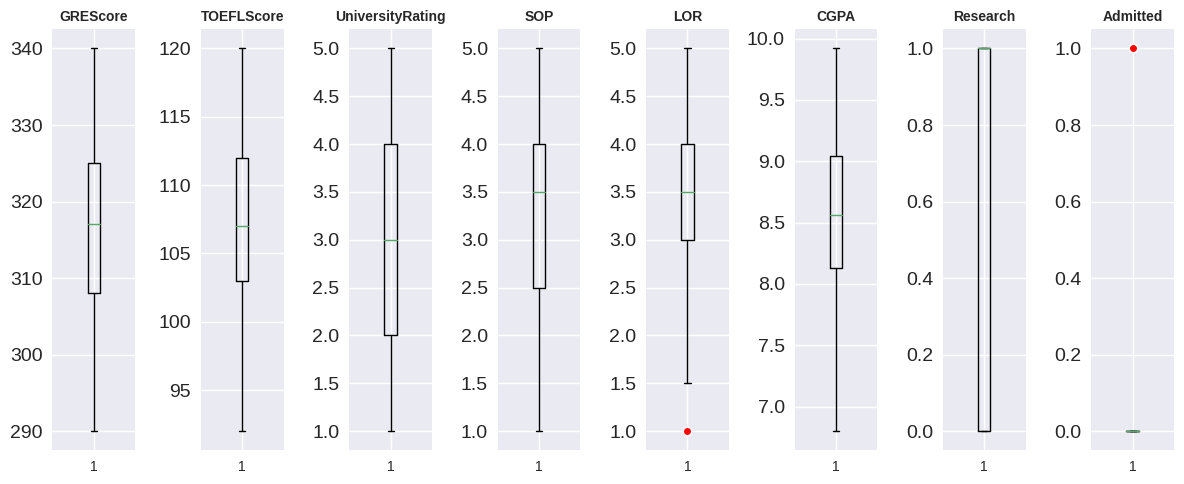

In [70]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(12,5))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=10, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

In [71]:
df['LOR'] = [np.log(x) for x in df['LOR']]

print(df) 

     GREScore  TOEFLScore  UniversityRating  SOP       LOR  CGPA  Research  \
0         337         118                 4  4.5  1.504077  9.65         1   
1         324         107                 4  4.0  1.504077  8.87         1   
2         316         104                 3  3.0  1.252763  8.00         1   
3         322         110                 3  3.5  0.916291  8.67         1   
4         314         103                 2  2.0  1.098612  8.21         0   
..        ...         ...               ...  ...       ...   ...       ...   
495       332         108                 5  4.5  1.386294  9.02         1   
496       337         117                 5  5.0  1.609438  9.87         1   
497       330         120                 5  4.5  1.609438  9.56         1   
498       312         103                 4  4.0  1.609438  8.43         0   
499       327         113                 4  4.5  1.504077  9.04         0   

     Admitted  
0           1  
1           0  
2           0  

In [24]:
df['CGPA'].value_counts()

8.76    9
8.00    9
8.12    7
8.45    7
8.54    7
       ..
9.92    1
9.35    1
8.71    1
9.32    1
7.69    1
Name: CGPA, Length: 184, dtype: int64

In [72]:
def compute_impurity(feature, impurity_criterion):
    """
    This function calculates impurity of a feature.
    Supported impurity criteria: 'entropy', 'gini'
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    probs = feature.value_counts(normalize=True)
    
    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError('Unknown impurity criterion')
        
    return(round(impurity, 3))

In [73]:
def comp_feature_information_gain(df, target, descriptive_feature, split_criterion):
    """
    This function calculates information gain for splitting on 
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy', 'gini'
    """
    
    print('target feature:', target)
    print('descriptive_feature:', descriptive_feature)
    print('split criterion:', split_criterion)
            
    target_entropy = compute_impurity(df[target], split_criterion)

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()
    
    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target], split_criterion)
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    print('impurity of partitions:', entropy_list)
    print('weights of partitions:', weight_list)

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    print('remaining impurity:', feature_remaining_impurity)
    
    information_gain = target_entropy - feature_remaining_impurity
    print('information gain:', information_gain)
    
    print('====================')

    return(information_gain)

In [74]:
split_criterion = 'entropy'
for feature in df.drop(columns='Admitted').columns:
    feature_info_gain = comp_feature_information_gain(df, 'Admitted', feature, split_criterion)

target feature: Admitted
descriptive_feature: GREScore
split criterion: entropy
impurity of partitions: [-0.0, 0.258, -0.0, 0.523, -0.0, 0.954, 0.323, -0.0, -0.0, 0.391, 0.353, 0.323, 0.918, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.811, -0.0, 0.503, -0.0, -0.0, -0.0, -0.0, -0.0, 0.764, 0.337, -0.0, -0.0, -0.0, 0.954, 0.414, -0.0, 0.918, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.811, -0.0, -0.0]
weights of partitions: [0.004, 0.046, 0.036, 0.034, 0.032, 0.016, 0.034, 0.026, 0.014, 0.026, 0.03, 0.034, 0.018, 0.02, 0.032, 0.03, 0.024, 0.024, 0.01, 0.048, 0.016, 0.01, 0.018, 0.02, 0.01, 0.022, 0.024, 0.008, 0.018, 0.032, 0.02, 0.024, 0.024, 0.016, 0.024, 0.02, 0.006, 0.018, 0.026, 0.022, 0.01, 0.004, 0.014, 0.022, 0.004, 0.008, 0.008, 0.012, 0.002]
remaining impurity: 0.18792
information gain: 0.34708000000000006
target feature: Admitted
descriptive_feature: TOEFLScore
split criterion: entropy
impurity of partitions: [0.469, -0.0, -0.0, 0.156, -0.0, 0.946, -0.0, -0.0, -0.0

In [75]:
split_criteria = 'gini'
for feature in df.drop(columns='Admitted').columns:
    feature_info_gain = comp_feature_information_gain(df, 'Admitted', feature, split_criteria)

target feature: Admitted
descriptive_feature: GREScore
split criterion: gini
impurity of partitions: [0.0, 0.083, 0.0, 0.208, 0.0, 0.469, 0.111, 0.0, 0.0, 0.142, 0.124, 0.111, 0.444, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.375, 0.0, 0.198, 0.0, 0.0, 0.0, 0.0, 0.0, 0.346, 0.117, 0.0, 0.0, 0.0, 0.469, 0.153, 0.0, 0.444, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.375, 0.0, 0.0]
weights of partitions: [0.004, 0.046, 0.036, 0.034, 0.032, 0.016, 0.034, 0.026, 0.014, 0.026, 0.03, 0.034, 0.018, 0.02, 0.032, 0.03, 0.024, 0.024, 0.01, 0.048, 0.016, 0.01, 0.018, 0.02, 0.01, 0.022, 0.024, 0.008, 0.018, 0.032, 0.02, 0.024, 0.024, 0.016, 0.024, 0.02, 0.006, 0.018, 0.026, 0.022, 0.01, 0.004, 0.014, 0.022, 0.004, 0.008, 0.008, 0.012, 0.002]
remaining impurity: 0.077722
information gain: 0.136278
target feature: Admitted
descriptive_feature: TOEFLScore
split criterion: gini
impurity of partitions: [0.18, 0.0, 0.0, 0.044, 0.0, 0.463, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18, 0.245, 0.0, 0.278, 0.375, 0.48, 0.346,

In [76]:
df1 = df[['CGPA', 'Admitted']]
df2=df1
df3=df1
# Print the new dataframe
print(df1)

     CGPA  Admitted
0    9.65         1
1    8.87         0
2    8.00         0
3    8.67         0
4    8.21         0
..    ...       ...
495  9.02         0
496  9.87         1
497  9.56         1
498  8.43         0
499  9.04         0

[500 rows x 2 columns]


In [77]:
from sklearn.preprocessing import LabelEncoder

# Define the label encoder
label_encoder = LabelEncoder()

# Convert the float column to integer using the label encoder
df1['Admitted'] = label_encoder.fit_transform(df1['Admitted'].astype(int))
df1['CGPA'] = label_encoder.fit_transform(df1['CGPA'].astype(int))

In [78]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(0)
df_train, df_test = train_test_split(df1, train_size = 0.70, test_size = 0.30, random_state = 100)

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
df_train.head()
# Apply scaler() to all the numeric variables

num_vars = ['CGPA','Admitted']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
# Checking values after scaling
df_train.head()

,CGPA,Admitted
153,0.666667,0.0
84,1.000000,1.0
310,0.666667,0.0
494,0.666667,0.0
126,1.000000,0.0


In [80]:
#building decision tree
y = df_train.pop('Admitted')
X= df_train

In [81]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=80)

In [82]:
# Load libraries
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print('Error', np.sqrt(mean_squared_error(y_test, y_pred)))


Error 0.3380617018914066


In [83]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8857142857142857


In [89]:
r2_score = clf.score(X_test, y_test)*100
float("{0:.2f}".format(r2_score))

88.57

In [88]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[93  0]
 [12  0]]


In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        93
         1.0       0.00      0.00      0.00        12

    accuracy                           0.89       105
   macro avg       0.44      0.50      0.47       105
weighted avg       0.78      0.89      0.83       105



In [90]:
#applying K-nn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [92]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_test)
print('Error', np.sqrt(mean_squared_error(y_test, y_pred1)))

Error 0.45226701686664544


In [93]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy  of NN:",metrics.accuracy_score(y_test, y_pred1))

Accuracy  of NN: 0.7954545454545454


In [95]:
r2_score = clf.score(X_test, y_test)*100
float("{0:.2f}".format(r2_score))

86.36

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       1.00      0.76      0.87        76
         1.0       0.40      1.00      0.57        12

    accuracy                           0.80        88
   macro avg       0.70      0.88      0.72        88
weighted avg       0.92      0.80      0.83        88



In [106]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [97]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred1, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

ValueError: ignored

In [98]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, y_pred)
auc_score2 = roc_auc_score(y_test, y_pred1)

print(auc_score1, auc_score2)

ValueError: ignored

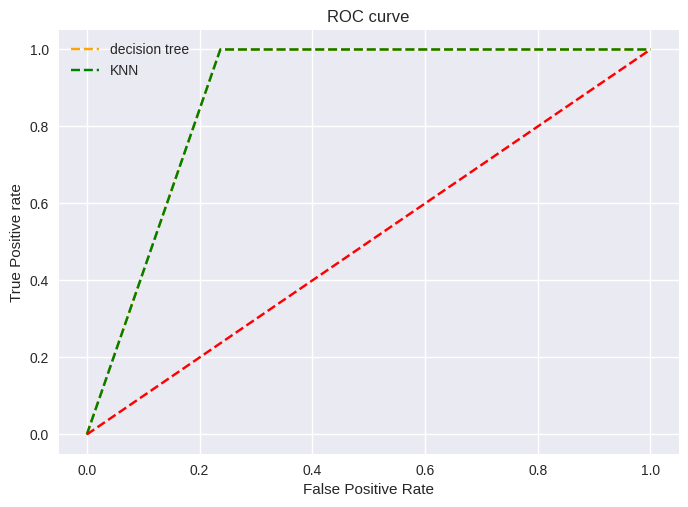

In [64]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='decision tree')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();